In [55]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [56]:
data = pd.read_csv("house-prices-tp.csv")

# El conjunto de datos de vivienda de Boston
El conjunto de datos de vivienda de Boston se deriva de la información recopilada por el Servicio del Censo de EE. UU. sobre viviendas en el área de Boston MA.

CRIM: tasa de criminalidad per cápita por ciudad

ZN: proporción de suelo residencial zonificado para lotes de más de 25.000 pies cuadrados.

INDUS: proporción de acres de negocios no minoristas por ciudad.

CHAS: Variable ficticia de Charles River (1 si el tramo limita con el río; 0 en caso contrario)

NOX: concentración de óxidos nítricos (partes por 10 millones)

RM: número medio de habitaciones por vivienda

EDAD: proporción de unidades ocupadas por sus propietarios construidas antes de 1940

DIS: distancias ponderadas a cinco centros de empleo de Boston

RAD: índice de accesibilidad a carreteras radiales

IMPUESTO: tasa de impuesto a la propiedad de valor total por $10,000

PTRATIO: ratio alumnos-maestro por ciudad

B: 1000(Bk - 0,63)^2 donde Bk es la proporción de negros por ciudad

LSTAT: % de estatus inferior de la población

MEDV: Valor medio de viviendas ocupadas por sus propietarios en miles de dólares

In [57]:
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.07151,0.0,4.49,0.0,0.449,6.121,56.8,3.7476,3.0,247.0,18.5,395.15,8.44,22.2
1,0.08265,0.0,13.92,0.0,0.437,6.127,18.4,5.5027,4.0,289.0,16.0,396.90,8.58,23.9
2,0.12816,12.5,6.07,0.0,0.409,5.885,33.0,6.4980,4.0,345.0,18.9,396.90,8.79,20.9
3,0.08873,21.0,5.64,0.0,0.439,5.963,45.7,6.8147,4.0,243.0,16.8,395.56,13.45,19.7
4,0.11432,0.0,8.56,0.0,0.520,6.781,71.3,2.8561,5.0,384.0,20.9,395.58,7.67,26.5


In [58]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,533.000000,534.000000,541.000000,533.000000,532.000000,535.000000,532.000000,541.000000,528.000000,538.000000,528.000000,534.000000,534.000000,535.000000
mean,5.845517,13.197175,11.218725,0.090056,0.560050,6.291839,67.632303,3.944102,9.699379,409.575089,18.429904,347.806040,13.028092,22.746809
std,13.828631,24.902981,6.942021,0.286531,0.119472,0.782403,28.461925,2.255689,8.684495,167.689379,2.194759,99.636208,7.579972,9.491452
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.084470,0.000000,5.130000,0.000000,0.453000,5.875500,42.275000,2.112100,4.000000,279.000000,17.000000,369.530000,7.150000,16.750000
50%,0.315330,0.000000,9.690000,0.000000,0.538000,6.208000,76.500000,3.340107,5.000000,335.000000,19.000000,390.815000,11.465000,21.200000
75%,4.871410,20.000000,18.100000,0.000000,0.643986,6.638500,93.825000,5.400700,23.632660,666.000000,20.200000,395.890000,17.205000,26.300000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [59]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 556 entries, 0 to 555
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     533 non-null    float64
 1   ZN       534 non-null    float64
 2   INDUS    541 non-null    float64
 3   CHAS     533 non-null    float64
 4   NOX      532 non-null    float64
 5   RM       535 non-null    float64
 6   AGE      532 non-null    float64
 7   DIS      541 non-null    float64
 8   RAD      528 non-null    float64
 9   TAX      538 non-null    float64
 10  PTRATIO  528 non-null    float64
 11  B        534 non-null    float64
 12  LSTAT    534 non-null    float64
 13  MEDV     535 non-null    float64
dtypes: float64(14)
memory usage: 60.9 KB


In [60]:
#borrar las filas que tengan null en la columna MEDV
data = data.dropna(subset=['MEDV'])

In [61]:
#Buscar filas duplicadas
duplicados = data.duplicated()
filas_duplicadas = data[duplicados]
print(filas_duplicadas)

Empty DataFrame
Columns: [CRIM, ZN, INDUS, CHAS, NOX, RM, AGE, DIS, RAD, TAX, PTRATIO, B, LSTAT, MEDV]
Index: []


In [62]:
# divimos el dataset en set de entrenamiento y de testeo
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data.drop('MEDV', axis=1),
                                             data['MEDV'],
                                             test_size=0.2,
                                             random_state=24,
                                             shuffle=True
                                             )

In [63]:
X_train.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,418.000000,418.000000,425.000000,421.000000,420.000000,423.000000,419.000000,424.000000,421.000000,421.000000,421.000000,419.000000,420.000000
mean,5.012836,11.942654,11.239233,0.083135,0.562392,6.294392,68.170842,3.884169,9.751688,409.946389,18.339069,347.191583,12.921385
std,11.725586,23.644382,6.860876,0.276415,0.120374,0.777032,28.626457,2.221961,8.673872,166.987748,2.239601,102.490345,7.507515
min,0.006320,0.000000,0.740000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.090658,0.000000,5.190000,0.000000,0.458000,5.884500,42.500000,2.102875,4.000000,281.000000,16.800000,370.520000,7.135000
50%,0.327940,0.000000,9.900000,0.000000,0.538000,6.209000,76.900000,3.317500,5.000000,334.000000,18.700000,390.860000,11.395000
75%,4.797190,17.485394,18.100000,0.000000,0.647000,6.653000,93.850000,5.255350,24.000000,666.000000,20.200000,395.690000,17.152500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000


In [64]:
#mostrar filas con null
null_rows = X_train[X_train.isnull().any(axis=1)]
print(len(null_rows))
null_rows


24


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
520,64.454622,51.572705,12.832008,1.0,0.762058,5.656463,NaN,NaN,NaN,267.449501,21.743988,305.396257,33.964324
309,45.877735,NaN,4.532716,0.0,NaN,6.977480,NaN,4.658411,4.811748,652.148598,17.427969,NaN,24.417974
413,NaN,NaN,4.987915,NaN,0.420579,8.010940,NaN,11.109179,2.402424,614.073104,15.926526,47.855250,10.377838
486,54.951996,NaN,12.427680,0.0,0.839161,5.418563,NaN,5.825079,2.573615,524.843763,18.287121,NaN,18.377381
158,NaN,16.026020,NaN,0.0,0.815798,7.680745,16.376653,10.772406,22.069511,NaN,NaN,99.928197,NaN
14,30.986519,60.711549,8.827191,0.0,0.747569,NaN,23.593405,5.062472,10.554892,621.330711,16.634925,60.162028,30.494822
23,73.605747,90.434661,12.740286,0.0,NaN,8.050076,22.542424,5.731208,NaN,NaN,21.291610,NaN,NaN
128,NaN,NaN,13.613966,1.0,0.655441,6.934419,26.190734,10.590040,6.850123,433.579295,12.721609,81.889481,NaN
223,NaN,NaN,15.523638,NaN,NaN,NaN,35.540367,1.967787,1.307128,NaN,13.364849,200.625160,NaN
327,76.757317,17.441575,26.402542,1.0,0.633879,7.552326,41.839732,6.348894,3.056548,504.220821,20.896238,NaN,12.242018


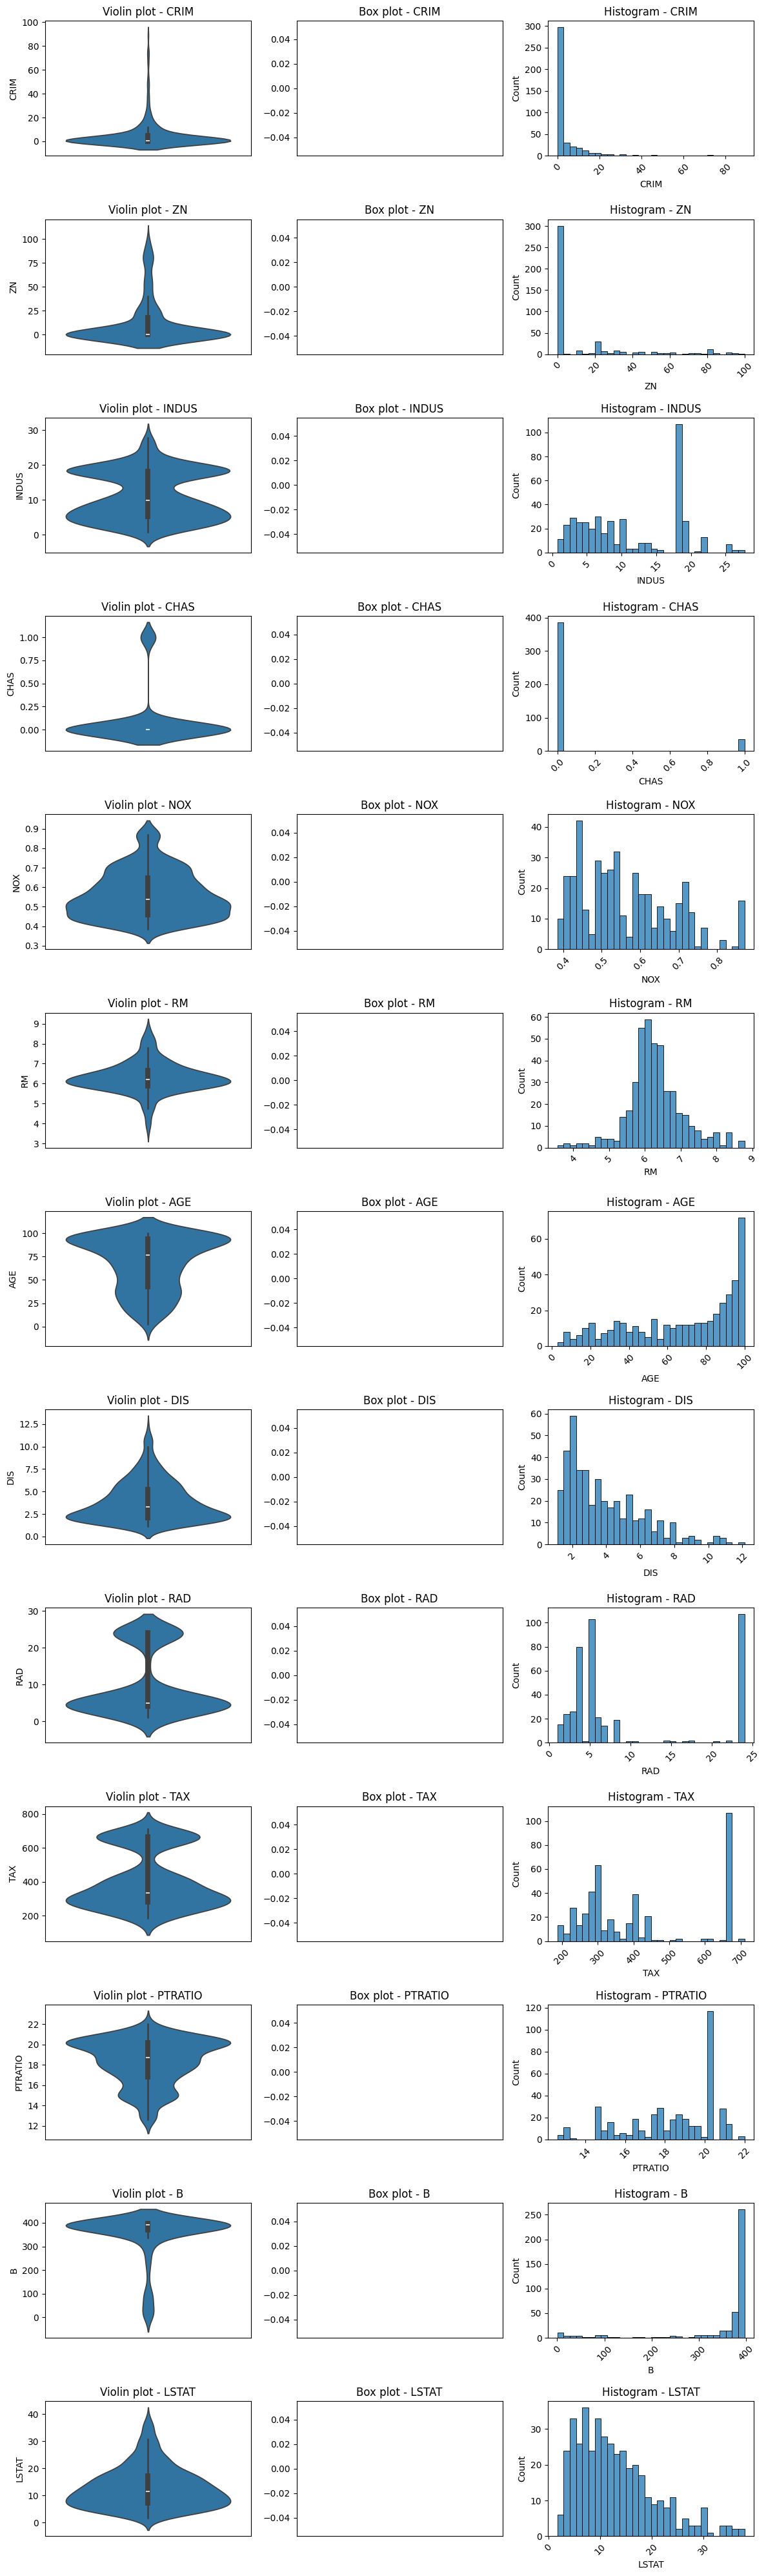

In [65]:
# Graficamos las variables con violin plot, boxplot e histograma
plt.figure(figsize=(12, 40))
for i, column in enumerate(X_train.columns):
    # Gráfico de violín
    plt.subplot(len(X_train.columns), 3, 3*i + 1)
    sns.violinplot(X_train[column])
    plt.title(f'Violin plot - {column}')
    plt.xticks([])

    # Gráfico de caja
    plt.subplot(len(X_train.columns), 3, 3*i + 2)
    plt.boxplot(X_train[column])
    plt.title(f'Box plot - {column}')
    plt.xticks([])

    # Histograma
    plt.subplot(len(X_train.columns), 3, 3*i + 3)
    sns.histplot(X_train[column], bins=30, kde=False)
    plt.title(f'Histogram - {column}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Completar valores faltantes

## knn

In [66]:
# CHAS completamos valores faltantes con la moda
chas_mode= X_train['CHAS'].mode()[0]
X_train['CHAS'].fillna(chas_mode, inplace=True)
X_test['CHAS'].fillna(chas_mode, inplace=True)

C:\Users\Ulises\AppData\Local\Temp\ipykernel_6196\3564455181.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  X_train['CHAS'].fillna(chas_mode, inplace=True)
C:\Users\Ulises\AppData\Local\Temp\ipykernel_6196\3564455181.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exam

In [67]:
#Completamos valores faltantes con knn
from sklearn.impute import KNNImputer
knn_imputer = KNNImputer()
X_train_imputed = knn_imputer.fit_transform(X_train)
X_train = pd.DataFrame(X_train_imputed, columns=X_train.columns)
X_test = pd.DataFrame(knn_imputer.transform(X_test))

## Scalers

In [68]:
from sklearn.preprocessing import RobustScaler
# Escalamos los datos usando RobustScaler para evitar la influencia de outliers y desconocemos el rango de los datos
scaler = RobustScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


#viz

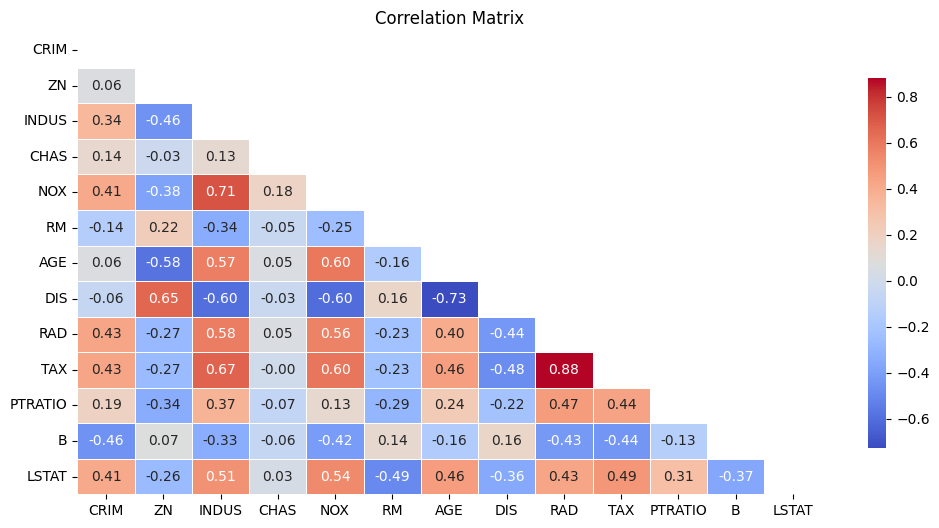

In [69]:
#Creamos heatmap con la matriz de correlacion
correlation_matrix = X_train_scaled.corr()

plt.figure(figsize=(12, 6))
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, cbar_kws={"shrink": 0.8})
plt.title("Correlation Matrix")
plt.show()

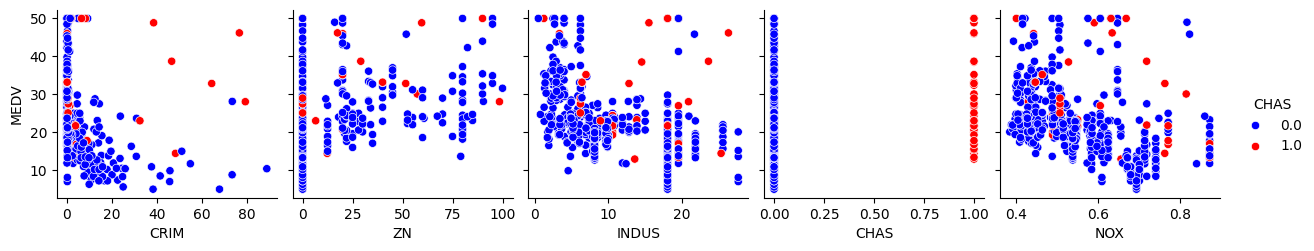

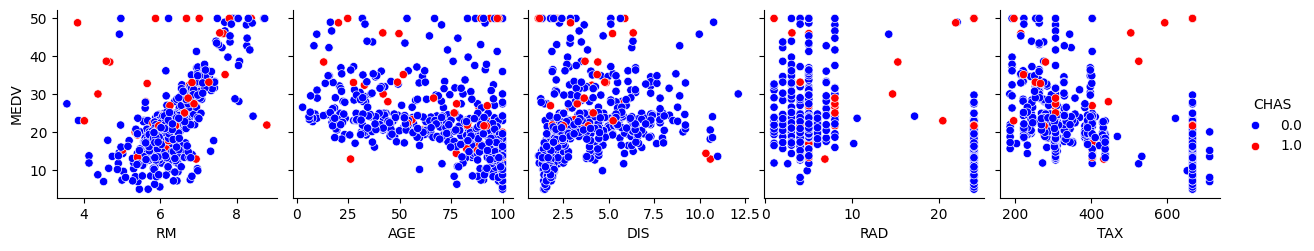

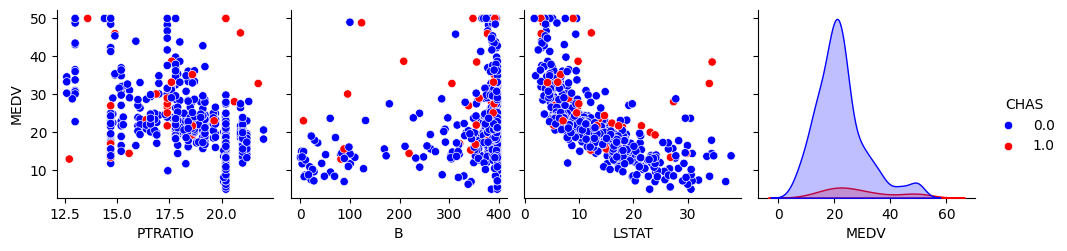

In [70]:
#Pairplot
for i in range(0, len(data.columns), 5):
    sns.pairplot(data=data,
                x_vars=data.columns[i:i+5],
                y_vars=['MEDV'],
                hue='CHAS',
                palette={0: 'blue', 1: 'red'})  # Diferenciar por la variable categorica CHAS
    plt.show()

# Regresion lineal

In [71]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
def metricas(model,y_train_pred, y_test_pred):

  RMSE_train = mean_squared_error(y_train, y_train_pred, squared=False)
  RMSE_test = mean_squared_error(y_test, y_test_pred, squared=False)
  MAE_train = mean_absolute_error(y_train, y_train_pred)
  MAE_test = mean_absolute_error(y_test, y_test_pred)


  x=range(len(y_test))
  plt.scatter(x, y=y_test_pred, label='predicciones')
  plt.scatter(x, y=y_test, label='real')
  plt.legend()
  plt.show()

  fig = plt.figure(figsize=(10,5))
  sns.histplot((y_test - y_test_pred), color="red", kde=True, stat="density", linewidth=0,bins=20)
  fig.suptitle('Análisis de Residuos', fontsize = 20)
  plt.show()

  fig = plt.figure(figsize=(8,4))
  fig.suptitle('residuos')
  plt.xlabel('y_test')
  plt.ylabel('residuos')
  plt.scatter(y_test,100*(y_test-y_test_pred)/y_test)
  plt.show()
  print(model.steps[1][1])

  print('RMSE en el conjunto de entrenamiento: {}'.format(round(RMSE_train, 2)))
  print('RMSE en el conjunto de test: {}'.format(round(RMSE_test, 2)))
  print('MAE en el conjunto de entrenamiento: {}'.format(round(MAE_train, 2)))
  print('MAE en el conjunto de test: {}'.format(round(MAE_test, 2)))

  print("R2 entrenamiento:",model.steps[1][1].score(X_train_scaled.values,y_train))
  print("R2 test:",model.steps[1][1].score(X_test_scaled.values,y_test))

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


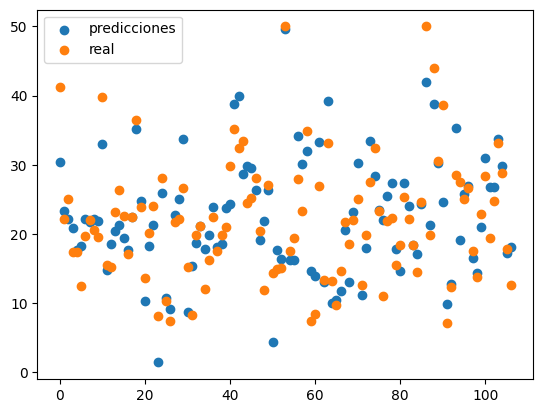

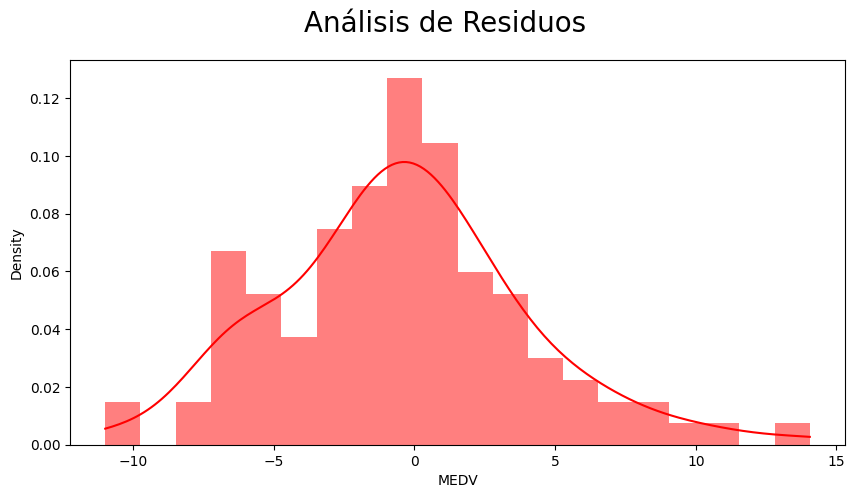

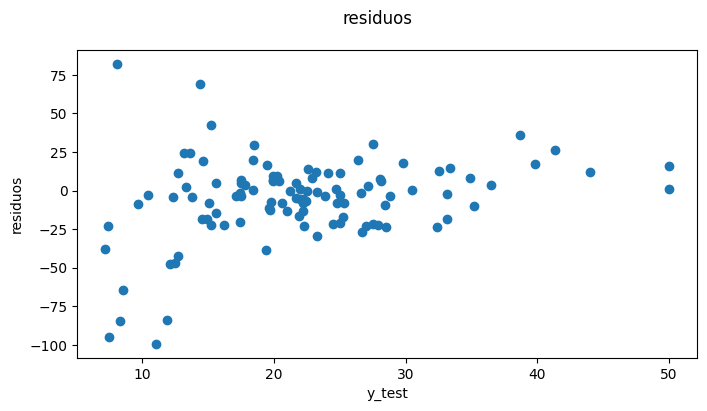

LinearRegression()
RMSE en el conjunto de entrenamiento: 6.08
RMSE en el conjunto de test: 4.4
MAE en el conjunto de entrenamiento: 4.08
MAE en el conjunto de test: 3.35
R2 entrenamiento: 0.6047731979367093
R2 test: 0.7396850312541552


In [72]:
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline
lr_medv = make_pipeline(RobustScaler(), LinearRegression())
lr_medv.fit(X_train, y_train)

metricas(lr_medv,lr_medv.predict(X_train),lr_medv.predict(X_test))

# GD

C:\Users\Ulises\AppData\Local\Temp\ipykernel_6196\909605329.py:10: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  sgd_reg.steps[1][1].partial_fit(X_train_scaled.values, y_train.ravel())
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
C:\Users\Ulises\AppData\Local\Temp\ipykernel_6196\909605329.py:10: FutureWarning: Series.ravel is deprecat

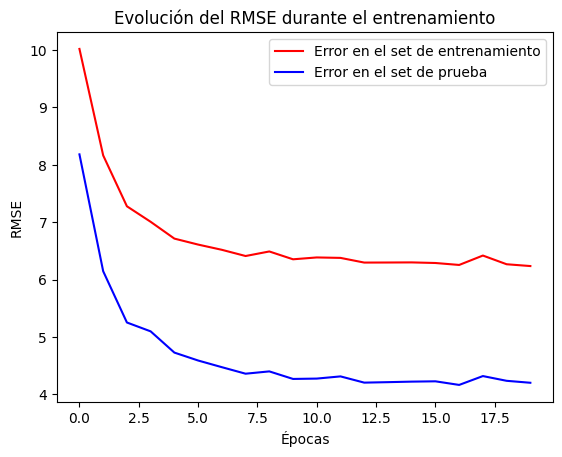

In [73]:
from sklearn.linear_model import SGDRegressor
# Inicializamos el modelo con Gradiente Descendiente Estocástico
sgd_reg = make_pipeline(RobustScaler(),SGDRegressor(alpha=0.0042475715525368985	,penalty="elasticnet",l1_ratio = 0.001))

# Para observar el progreso del error durante las iteraciones, graficamos manualmente el error:
train_errors = []
test_errors = []
n_epochs = 20
for epoch in range(n_epochs):
    sgd_reg.steps[1][1].partial_fit(X_train_scaled.values, y_train.ravel())
    y_train_predict = sgd_reg.steps[1][1].predict(X_train_scaled.values)
    y_test_predict = sgd_reg.steps[1][1].predict(X_test_scaled.values)
    train_errors.append(mean_squared_error(y_train, y_train_predict,squared=False))
    test_errors.append(mean_squared_error(y_test, y_test_predict,squared=False))

# Graficamos el RMSE en cada época
plt.plot(train_errors, "r-", label="Error en el set de entrenamiento")
plt.plot(test_errors, "b-", label="Error en el set de prueba")
plt.xlabel("Épocas")
plt.ylabel("RMSE")
plt.legend()
plt.title("Evolución del RMSE durante el entrenamiento")
plt.show()

val, idx = min((val, idx) for (idx, val) in enumerate(test_errors))

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


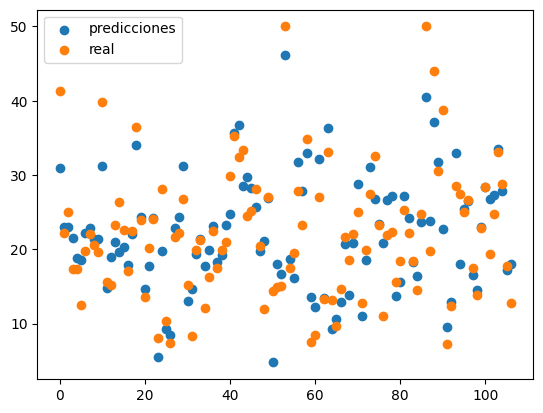

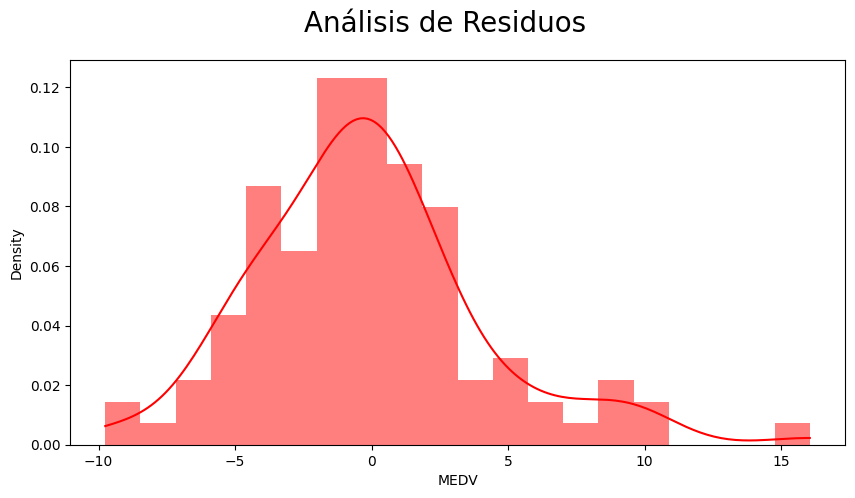

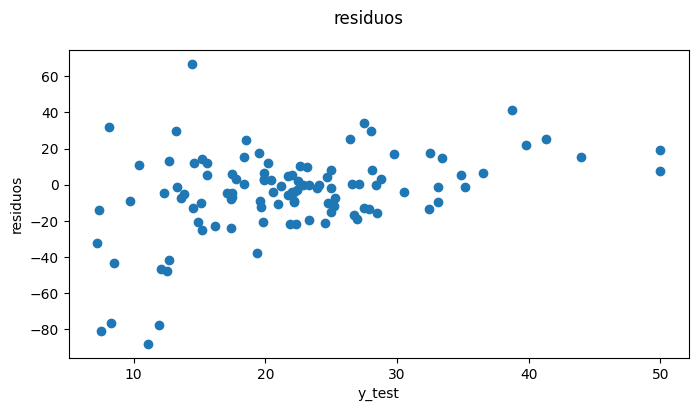

SGDRegressor(alpha=0.0042475715525368985, l1_ratio=0.001, penalty='elasticnet')
RMSE en el conjunto de entrenamiento: 6.24
RMSE en el conjunto de test: 4.2
MAE en el conjunto de entrenamiento: 4.11
MAE en el conjunto de test: 3.07
R2 entrenamiento: 0.5847143314336088
R2 test: 0.7629839661477776


In [82]:
metricas(sgd_reg,sgd_reg.steps[1][1].predict(X_train_scaled.values),sgd_reg.steps[1][1].predict(X_test_scaled.values))

,l1_ratio,mod_EN.alphas_,mse_cv,rmse_cv
174,0.001,0.004248,41.240838,6.421903
173,0.001,0.004501,41.240889,6.421907
374,0.010,0.004248,41.241065,6.421921
175,0.001,0.004009,41.241076,6.421921
373,0.010,0.004501,41.241090,6.421923


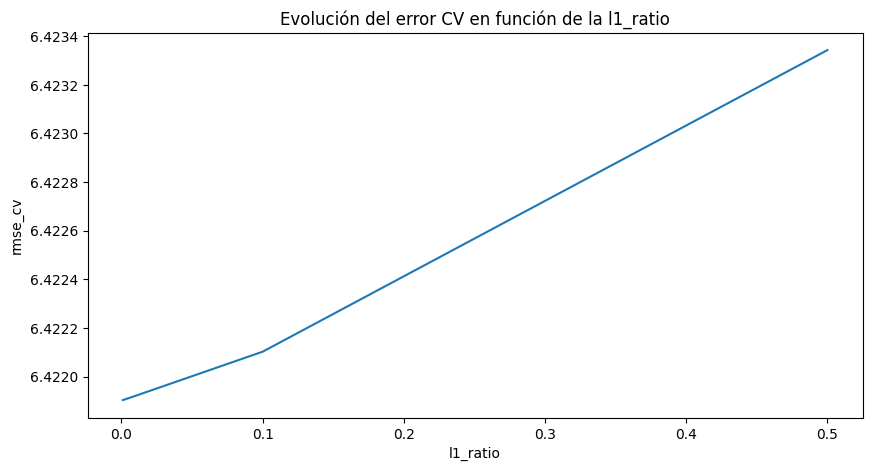

In [75]:
from sklearn.linear_model import ElasticNetCV

modelo_EN = make_pipeline(RobustScaler(),
                        ElasticNetCV(
                              l1_ratio        = [0.001, 0.01, 0.1, 0.5],
                              alphas          = np.logspace(-3, 2, 200),
                              cv              = 4,
                              max_iter        = 1000
                           )
         )

_ = modelo_EN.fit(X_train, y_train)

mod_EN = modelo_EN.steps[1][1]

# Error medio de las particiones por cada valor de alpha y l1_ratio
mean_error_cv = mod_EN.mse_path_.mean(axis =2)

# El resultado es un array de dimensiones (n_l1_ratio, n_alpha) se convierte en un dataframe
df_resultados_cv = pd.DataFrame(
                        data   = mean_error_cv.flatten(),
                        index  = pd.MultiIndex.from_product(
                                    iterables = [mod_EN.l1_ratio, mod_EN.alphas_],
                                    names     = ['l1_ratio', 'mod_EN.alphas_']
                                 ),
                        columns = ["mse_cv"]
                    )

df_resultados_cv['rmse_cv'] = np.sqrt(df_resultados_cv['mse_cv'])
df_resultados_cv = df_resultados_cv.reset_index().sort_values('mse_cv', ascending = True)


fig, ax = plt.subplots(figsize=(10, 5))
df_resultados_cv.groupby('l1_ratio')['rmse_cv'].min().plot(ax = ax)
ax.set_title('Evolución del error CV en función de la l1_ratio')
ax.set_xlabel('l1_ratio')
ax.set_ylabel('rmse_cv')

df_resultados_cv.head()

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


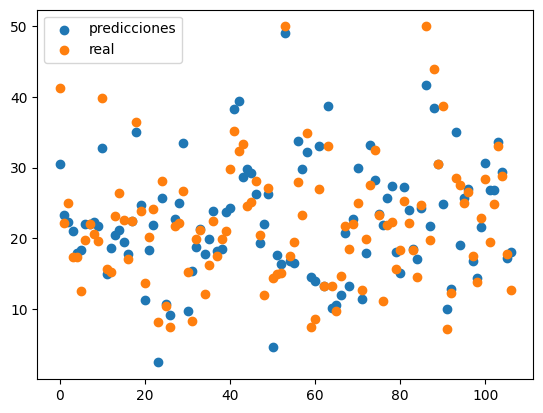

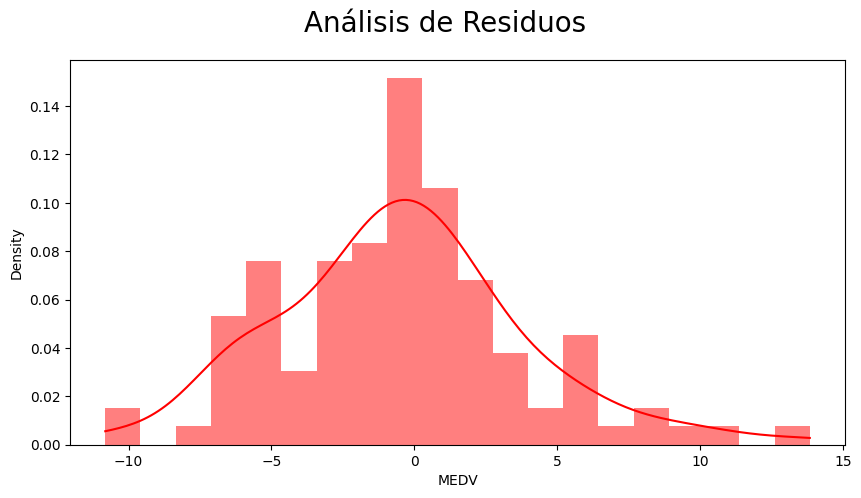

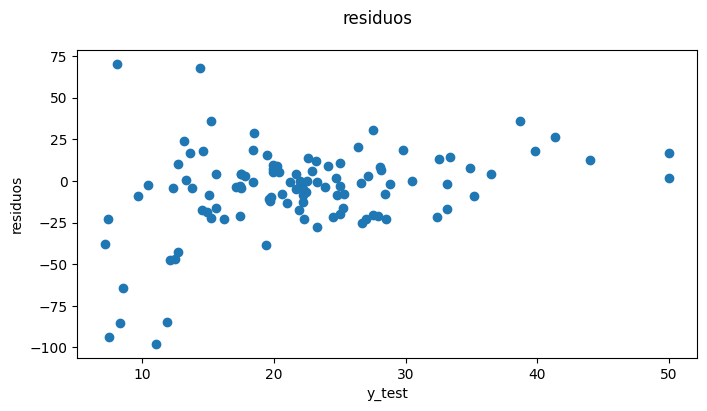

ElasticNetCV(alphas=array([1.00000000e-03, 1.05956018e-03, 1.12266777e-03, 1.18953407e-03,
       1.26038293e-03, 1.33545156e-03, 1.41499130e-03, 1.49926843e-03,
       1.58856513e-03, 1.68318035e-03, 1.78343088e-03, 1.88965234e-03,
       2.00220037e-03, 2.12145178e-03, 2.24780583e-03, 2.38168555e-03,
       2.52353917e-03, 2.67384162e-03, 2.83309610e-03, 3.00183581e-03,
       3.18062569e-03, 3.370064...
       2.64308149e+01, 2.80050389e+01, 2.96730241e+01, 3.14403547e+01,
       3.33129479e+01, 3.52970730e+01, 3.73993730e+01, 3.96268864e+01,
       4.19870708e+01, 4.44878283e+01, 4.71375313e+01, 4.99450512e+01,
       5.29197874e+01, 5.60716994e+01, 5.94113398e+01, 6.29498899e+01,
       6.66991966e+01, 7.06718127e+01, 7.48810386e+01, 7.93409667e+01,
       8.40665289e+01, 8.90735464e+01, 9.43787828e+01, 1.00000000e+02]),
             cv=4, l1_ratio=[0.001, 0.01, 0.1, 0.5])
RMSE en el conjunto de entrenamiento: 6.09
RMSE en el conjunto de test: 4.31
MAE en el conjunto de entrenamie

In [76]:
metricas(modelo_EN,modelo_EN.steps[1][1].predict(X_train_scaled.values),modelo_EN.steps[1][1].predict(X_test_scaled.values))

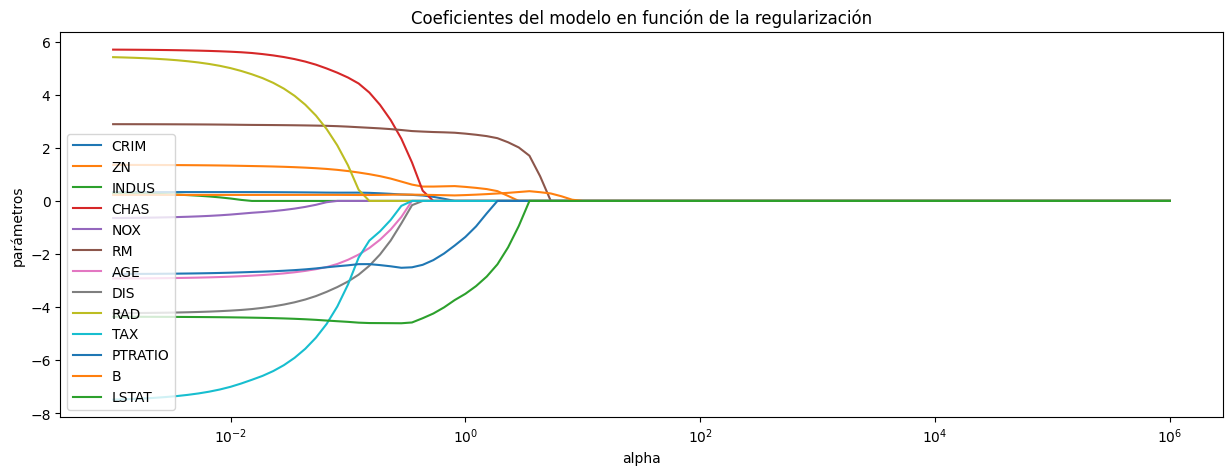

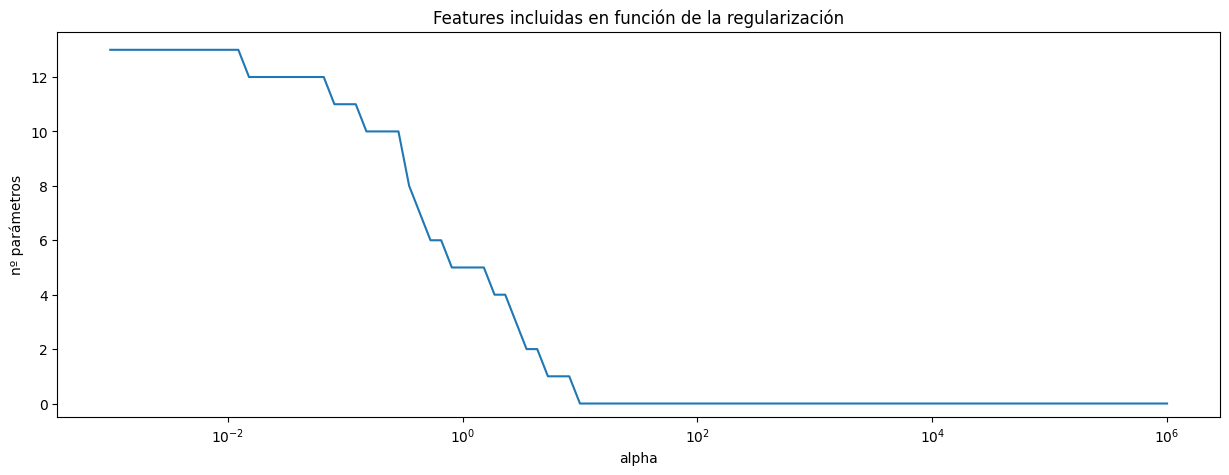

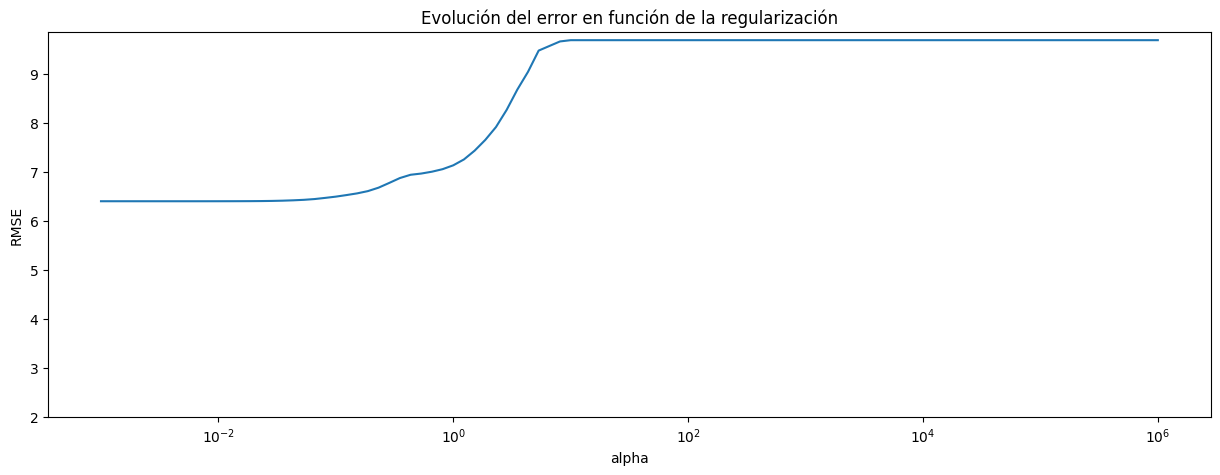

mejor alpha: 0.005336699231206312


In [77]:
from sklearn.linear_model import Lasso, LassoCV

modelo_L = make_pipeline(RobustScaler(),
                        LassoCV(
                           alphas=np.logspace(-3, 6, 100),
                           cv=10
                        )
         )

_ = modelo_L.fit(X_train, y_train)

mod_L = modelo_L.steps[1][1]

alphas = mod_L.alphas_
coefs = []

for alpha in alphas:
    modelo_aux_L = make_pipeline(RobustScaler(), Lasso(alpha=alpha))
    modelo_aux_L.fit(X_train, y_train)
    coefs.append(modelo_aux_L.steps[1][1].coef_.flatten())

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_ylim([None,None])
ax.set_xlabel('alpha')
ax.set_ylabel('parámetros')
ax.legend()
ax.set_title('Coeficientes del modelo en función de la regularización')
plt.show()

alphas = mod_L.alphas_
n_predictores = []

for alpha in alphas:
    modelo_aux_L = make_pipeline(RobustScaler(), Lasso(alpha=alpha))
    modelo_aux_L.fit(X_train, y_train)
    coef_no_cero = np.sum(modelo_aux_L.steps[1][1].coef_.flatten() != 0)
    n_predictores.append(coef_no_cero)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, n_predictores)
ax.set_xscale('log')
ax.set_ylim([-0.5,None])
ax.set_xlabel('alpha')
ax.set_ylabel('nº parámetros')
ax.set_title('Features incluidas en función de la regularización')
plt.show()

#Graficar rmse segun alpha
mse_cv = mod_L.mse_path_.mean(axis=1)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

# Se identifica el mejor
min_rmse     = np.min(rmse_cv)
optimo       = mod_L.alphas_[np.argmin(rmse_cv)]

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(mod_L.alphas_, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

print("mejor alpha:",optimo)


c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


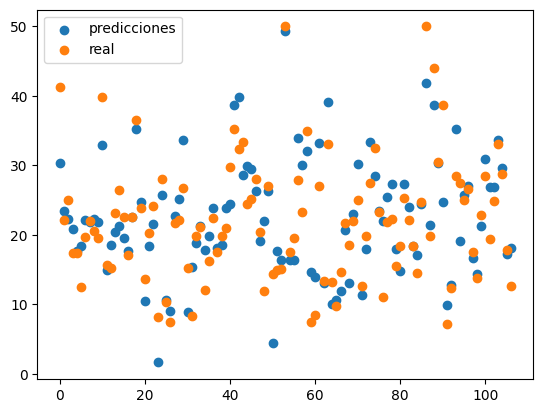

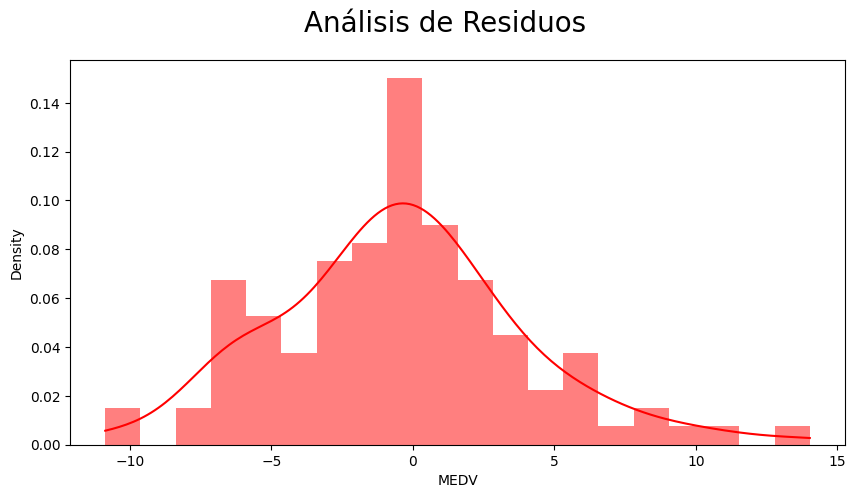

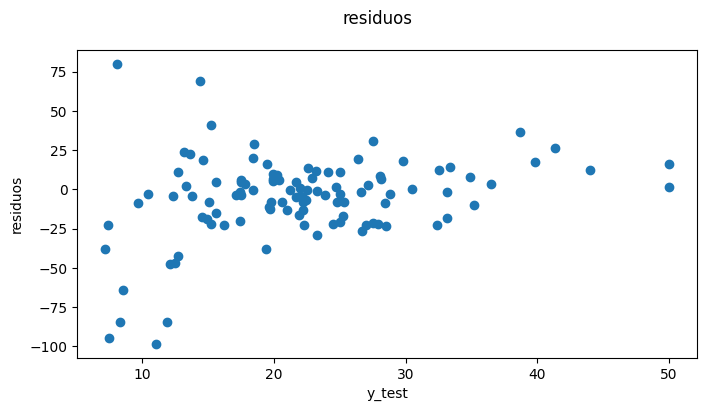

LassoCV(alphas=array([1.00000000e-03, 1.23284674e-03, 1.51991108e-03, 1.87381742e-03,
       2.31012970e-03, 2.84803587e-03, 3.51119173e-03, 4.32876128e-03,
       5.33669923e-03, 6.57933225e-03, 8.11130831e-03, 1.00000000e-02,
       1.23284674e-02, 1.51991108e-02, 1.87381742e-02, 2.31012970e-02,
       2.84803587e-02, 3.51119173e-02, 4.32876128e-02, 5.33669923e-02,
       6.57933225e-02, 8.11130831e-0...
       8.11130831e+03, 1.00000000e+04, 1.23284674e+04, 1.51991108e+04,
       1.87381742e+04, 2.31012970e+04, 2.84803587e+04, 3.51119173e+04,
       4.32876128e+04, 5.33669923e+04, 6.57933225e+04, 8.11130831e+04,
       1.00000000e+05, 1.23284674e+05, 1.51991108e+05, 1.87381742e+05,
       2.31012970e+05, 2.84803587e+05, 3.51119173e+05, 4.32876128e+05,
       5.33669923e+05, 6.57933225e+05, 8.11130831e+05, 1.00000000e+06]),
        cv=10)
RMSE en el conjunto de entrenamiento: 6.08
RMSE en el conjunto de test: 4.38
MAE en el conjunto de entrenamiento: 4.08
MAE en el conjunto de test: 

In [78]:
metricas(modelo_L,modelo_L.steps[1][1].predict(X_train_scaled.values),modelo_L.steps[1][1].predict(X_test_scaled.values))

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_ridge.py:2341: FutureWarning: 'store_cv_values' is deprecated in version 1.5 and will be removed in 1.7. Use 'store_cv_results' instead.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\utils\deprecation.py:102: FutureWarning: Attribute `cv_values_` is deprecated in version 1.5 and will be removed in 1.7. Use `cv_results_` instead.
  warnings.warn(msg, category=FutureWarning)


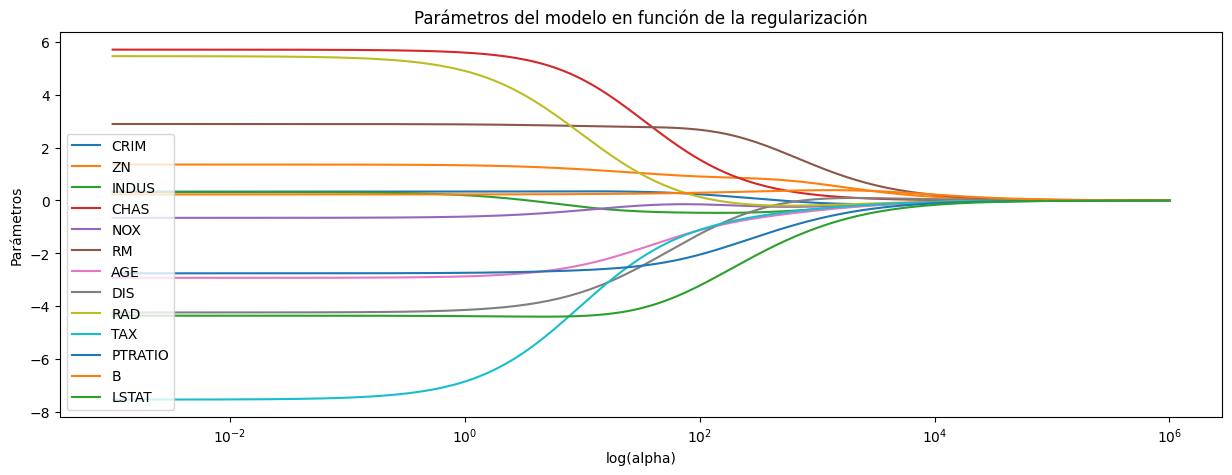

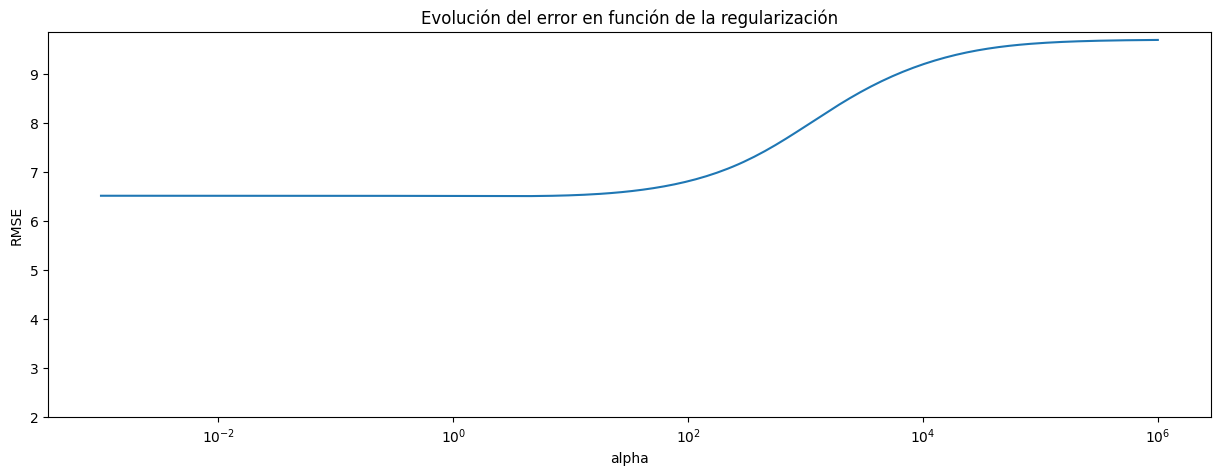

El mejor valor de alpha es: 2.736439997074672


In [79]:
# Evolución de los parámetros en función de alpha

from sklearn.linear_model import Ridge, RidgeCV
modelo_R = make_pipeline(RobustScaler(),
                        RidgeCV(
                           alphas          = np.logspace(-3, 6, 200),
                           fit_intercept   = True,
                           store_cv_values = True
                        )
         )

_ = modelo_R.fit(X_train, y_train)
alphas = modelo_R.steps[1][1].alphas
coefs = []

for alpha in alphas:
    modelo_aux_R = make_pipeline(RobustScaler(), Ridge(alpha=alpha))
    modelo_aux_R.fit(X_train, y_train)
    coefs.append(modelo_aux_R.steps[1][1].coef_.flatten())


mse_cv = modelo_R.steps[1][1].cv_values_.reshape((-1, 200)).mean(axis=0)

# Se aplica la raíz cuadrada para pasar de mse a rmse
rmse_cv = np.sqrt(mse_cv)

fig, ax = plt.subplots(figsize=(15, 5))
ax.plot(alphas, coefs, label=X_train.columns)
ax.set_xscale('log')
ax.set_xlabel('log(alpha)')
ax.set_ylabel('Parámetros')
ax.set_title('Parámetros del modelo en función de la regularización')
# show values of alpha between 14 and 15
ax.set_xlim([14, 15])
plt.axis('tight')
plt.legend()
plt.show()

fig, ax = plt.subplots(figsize=(15,5))
ax.plot(alphas, rmse_cv)
ax.set_xscale('log')
ax.set_ylim([2,None])
ax.set_title('Evolución del error en función de la regularización')
ax.set_xlabel('alpha')
ax.set_ylabel('RMSE')
plt.show()

mejor_alpha = modelo_R.steps[1][1].alpha_
print(f"El mejor valor de alpha es: {mejor_alpha}")

c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(
c:\Users\Ulises\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


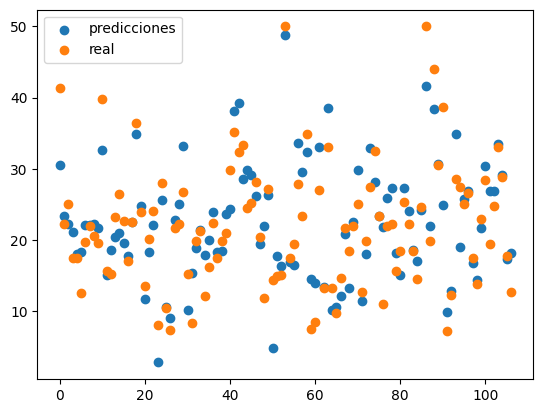

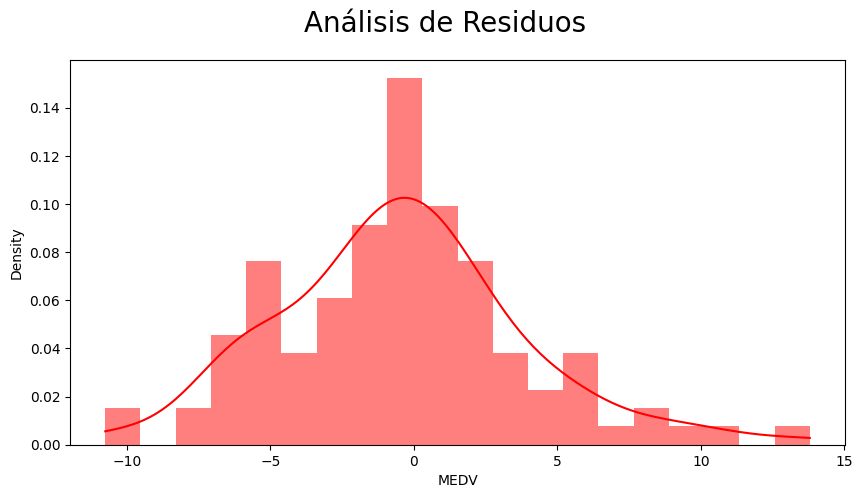

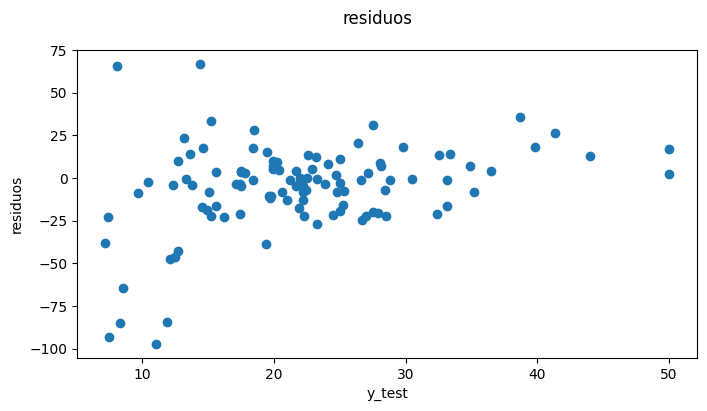

RidgeCV(alphas=array([1.00000000e-03, 1.10975250e-03, 1.23155060e-03, 1.36671636e-03,
       1.51671689e-03, 1.68318035e-03, 1.86791360e-03, 2.07292178e-03,
       2.30043012e-03, 2.55290807e-03, 2.83309610e-03, 3.14403547e-03,
       3.48910121e-03, 3.87203878e-03, 4.29700470e-03, 4.76861170e-03,
       5.29197874e-03, 5.87278661e-03, 6.51733960e-03, 7.23263390e-03,
       8.02643352e-03, 8.90735464e-0...
       9.11588830e+04, 1.01163798e+05, 1.12266777e+05, 1.24588336e+05,
       1.38262217e+05, 1.53436841e+05, 1.70276917e+05, 1.88965234e+05,
       2.09704640e+05, 2.32720248e+05, 2.58261876e+05, 2.86606762e+05,
       3.18062569e+05, 3.52970730e+05, 3.91710149e+05, 4.34701316e+05,
       4.82410870e+05, 5.35356668e+05, 5.94113398e+05, 6.59318827e+05,
       7.31680714e+05, 8.11984499e+05, 9.01101825e+05, 1.00000000e+06]),
        store_cv_values=True)
RMSE en el conjunto de entrenamiento: 6.09
RMSE en el conjunto de test: 4.27
MAE en el conjunto de entrenamiento: 4.07
MAE en el con

In [80]:
metricas(modelo_R,modelo_R.steps[1][1].predict(X_train_scaled.values),modelo_R.steps[1][1].predict(X_test_scaled.values))

# Conclusiones



Luego de probar varios modelos, decidimos quedarnos con el modelo de gradiente descendiente ya que es el modelo con menor RMSE y mayor R2.

Elegimos la métrica RMSE porque no penaliza los errores grandes tan fuertemente como MSE y porque los resultados esta función de perdida están expresados en la unidad original de los valores (miles de dólares).
Elegimos también R2 porque esta métrica mide la proporción de la varianza total de los datos explicada por el modelo.

Creemos que el modelo hace un buen fitting ya que el tiene un RMSE de aproximadamente 4,2 miles de dolares lo que indica que en promedio el error de predicción es relativamente bajo. Además, el R² es de aproximadamente 0.76, lo que significa que el modelo es capaz de explicar el 76% de la variabilidad en los datos de salida en relación con las entradas.